1. 自己情報量
1. Shannon's Entropy
1. Kullback–Leibler divergence
1. cross entropy ( 交差エントロピー )

- TODO: [交差エントロピー誤差をわかりやすく説明してみる - Qiita](https://qiita.com/kenta1984/items/59a9ef1788e6934fd962)



## Shannon's Entropy

### 参考

- [情報量 | 情報エントロピー（平均情報量）の求め方とその取りうる値域の証明](https://bi.biopapyrus.jp/seq/entropy.html)

$ H = -\sum_{E\in \Omega}P(E)\log P(E) $

- [情報量 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%83%85%E5%A0%B1%E9%87%8F)
** コイン投げの例


In [69]:
import numpy as np
import matplotlib.pyplot as plt

binary_entropy_function

$ H(X) = -p\log p - (1 - p) \log (1 - p) $

In [70]:
def binary_entropy_function(prob):
  return -prob*np.log(prob) - (1 - prob)*np.log(1 - prob)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


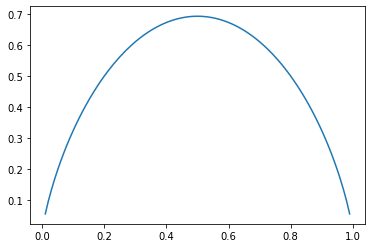

In [71]:
x = np.arange(0,10,0.01)

y = binary_entropy_function(x)

plt.plot(x,y)

## 例題

以下を計算してみる。

* [情報理論の基礎～情報量の定義から相対エントロピー、相互情報量まで～ | Logics of Blue](https://logics-of-blue.com/information-theory-basic/)
** 3．情報エントロピーと平均情報量

> 引用:
\begin{eqnarray} 
平均情報量 : H(X) &=& \displaystyle \sum_{ i = 1 }^{ 5 } – P(x_i) \times \log_{ 2 } P(x_i) \\ 
 &=& -\frac{ 1 }{ 5 } \times \{ \log_{ 2 } \frac{ 1 }{ 5 } +  \log_{ 2 } \frac{ 1 }{ 5 } +  \log_{ 2 } \frac{ 1 }{ 5 } +  \log_{ 2 } \frac{ 1 }{ 5 } +  \log_{ 2 } \frac{ 1 }{ 5 } \} \\ 
 &≒&2.32 
\end{eqnarray}
> 


In [72]:
def p(x):
  return 1/x

def sigma(num, value):
  sum = 0
  for _ in range(0, num):
    sum = sum + value
    # print("sum=" + str(sum))
  return sum

def s_i(x):
  return np.log2(p(x))

# TODO: X とは?
def h(x):
  return - p(x) * sigma(x, s_i(x))


In [83]:
# `情報B、Cをすでに持っていて、出た目が｛２，４，６，８，１０｝のどれかだと知っている場合の平均情報量`
h(5)

2.321928094887362

In [78]:
# `40個の目のうち、どれが出るかさっぱりわからない、という状態`
h(40)

5.321928094887367

1番目の例では、5 個から選ぶエントロピー。
2番目の例では、40 個から選ぶエントロピー。

x 個から選ぶエントロピーとして、横軸を x 、 縦軸をエントロピーにしたら、どんなグラフになるのか?


In [79]:
def create_entropy_array(x):
  y = np.array([])

  for x_element in x:
    # print(str(x_element))
    y_element = h(x_element)
    # print("y_element=" + str(y_element))
    y= np.append(y, y_element)

  # print("y=" + str(y))
  return y

In [80]:
def plot_entropy(x):
  plt.plot(x, create_entropy_array(x))
  plt.grid()
  # plt.xlim(0,40)
  plt.show()


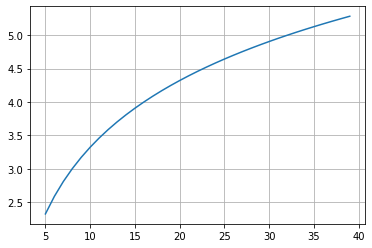

In [81]:
x = np.arange(5, 40, 1)
plot_entropy(x)

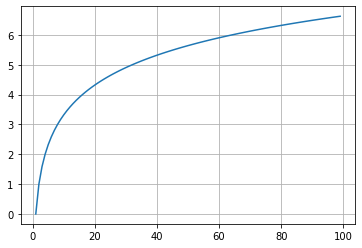

In [82]:
# もう少し大きくすると、
x2 = np.arange(1, 100, 1)
plot_entropy(x2)

### Conclusion

対数に似たグラフになる。
